## Fashion MNIST

In this notebook we will explore fashion mnist. 
This will show some of the basic capabilities and functions of tensorflow.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [22]:
#The class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the dataset

In [4]:
#Explore the dataset, find out the input format 
train_images.shape

(60000, 28, 28)

In [5]:
#Check how the labels look
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

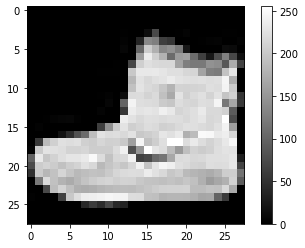

In [6]:
#Check how one image looks like
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#Normalize the pictures
train_images = train_images / 255.0
test_images = test_images / 255.0

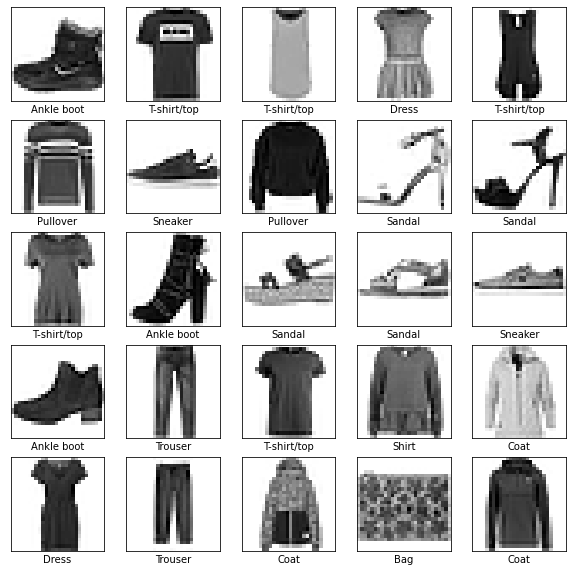

In [8]:
#Plot some of the resulting images togheter with their label. 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Creating a simple DNN model

In [9]:
# Create the first simple model dnn model
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)), #Always use input_shape in your first layer (Makes debugging easier)
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    return model

model = get_model()


In [10]:
#Compile the model with an adam optimizer, sparce categorical crossentropy and accuracy as a metric. 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE. 

In [11]:
#Train the model
history = model.fit(train_images, train_labels, epochs=10) # We get the history back

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5053 - accuracy: 0.8233
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3786 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3398 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3134 - accuracy: 0.8843
Epoch 5/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2949 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2813 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2687 - accuracy: 0.8992
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2580 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2472 - accuracy: 0.9078
Epoch 10/10
60

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

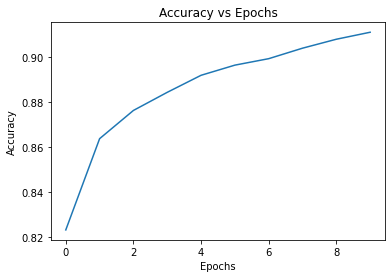

In [12]:

#Plot the history with the help of pandas
import pandas as pd
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")


In [13]:
#Check the test accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3305 - accuracy: 0.8886

Test accuracy: 0.8886


## Creating a cnn network

In [16]:
# Create a CNN network
def get_cnn_model():
    model = keras.Sequential([
        keras.layers.Conv2D(kernel_size=3, filters=2, input_shape=(28, 28, 1), activation="relu", data_format="channels_last"), #Make sure the data format is correct
        keras.layers.Flatten(), #Always use input_shape in your first layer (Makes debugging easier)
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    return model

cnn_model = get_cnn_model()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               173184    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 174,494
Trainable params: 174,494
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compile the model, use adam, sparse categoricalCrossentropy and accuracy as a metric.
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

In [18]:
# Need to make sure the input is in the right form, thus addd an axis
train_images_with_channel = train_images[:,:,:, np.newaxis]
test_images_with_channel = test_images[:,:,:,  np.newaxis]

In [19]:
#Train the model for 10 epochs and a batch size of 32. 
history = cnn_model.fit(train_images_with_channel, train_labels, batch_size=32, epochs=10) # We get the history back

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4937 - accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3478 - accuracy: 0.8745
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3012 - accuracy: 0.8895
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2695 - accuracy: 0.9000
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2405 - accuracy: 0.9115


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

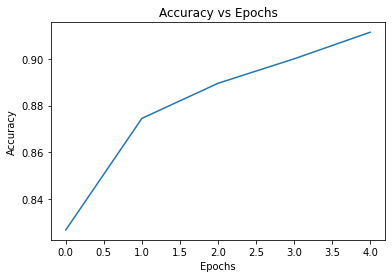

In [20]:
#Plot the history with the help of pandas
import pandas as pd
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [21]:
#Check the test accuracy
test_loss, test_acc = cnn_model.evaluate(test_images_with_channel,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3188 - accuracy: 0.8860

Test accuracy: 0.886
